<a href="https://colab.research.google.com/github/bacoco/deeplearning.fr/blob/main/eda_and_automl_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT your DATA

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/pplonski/datasets-for-start/master/adult/data.csv",skipinitialspace=True,)
target = 'income'
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32561 rows x 15 columns]

##### library to import

In [3]:
import sys
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[target], test_size=0.25)

# EDA - Exploratory Data Analysis


## SWEETVIZ

> https://github.com/fbdesignpro/sweetviz

> https://youtu.be/UR_OK8vBpeY




In [ ]:
!pip install sweetviz

In [6]:
import sweetviz as sv
my_report = sv.analyze(df)
# we generate html report
# Default arguments will generate to "SWEETVIZ_REPORT.html"
my_report.show_html() 

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



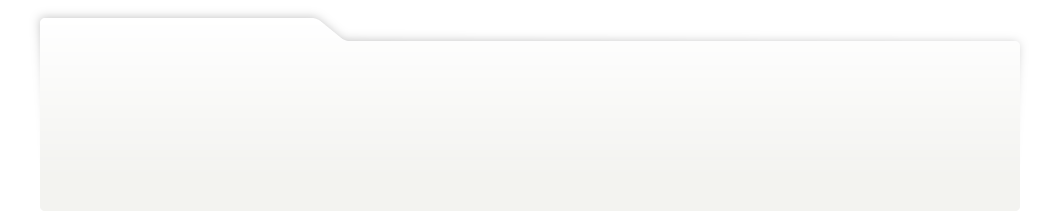
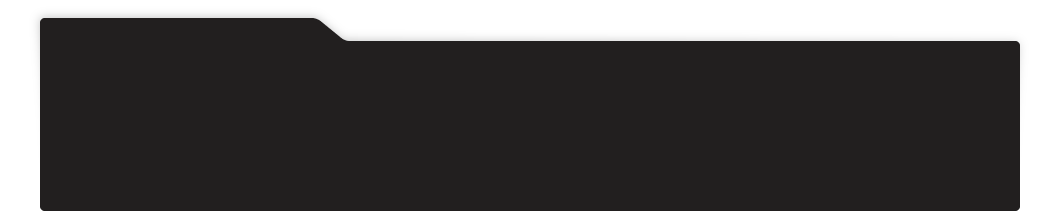
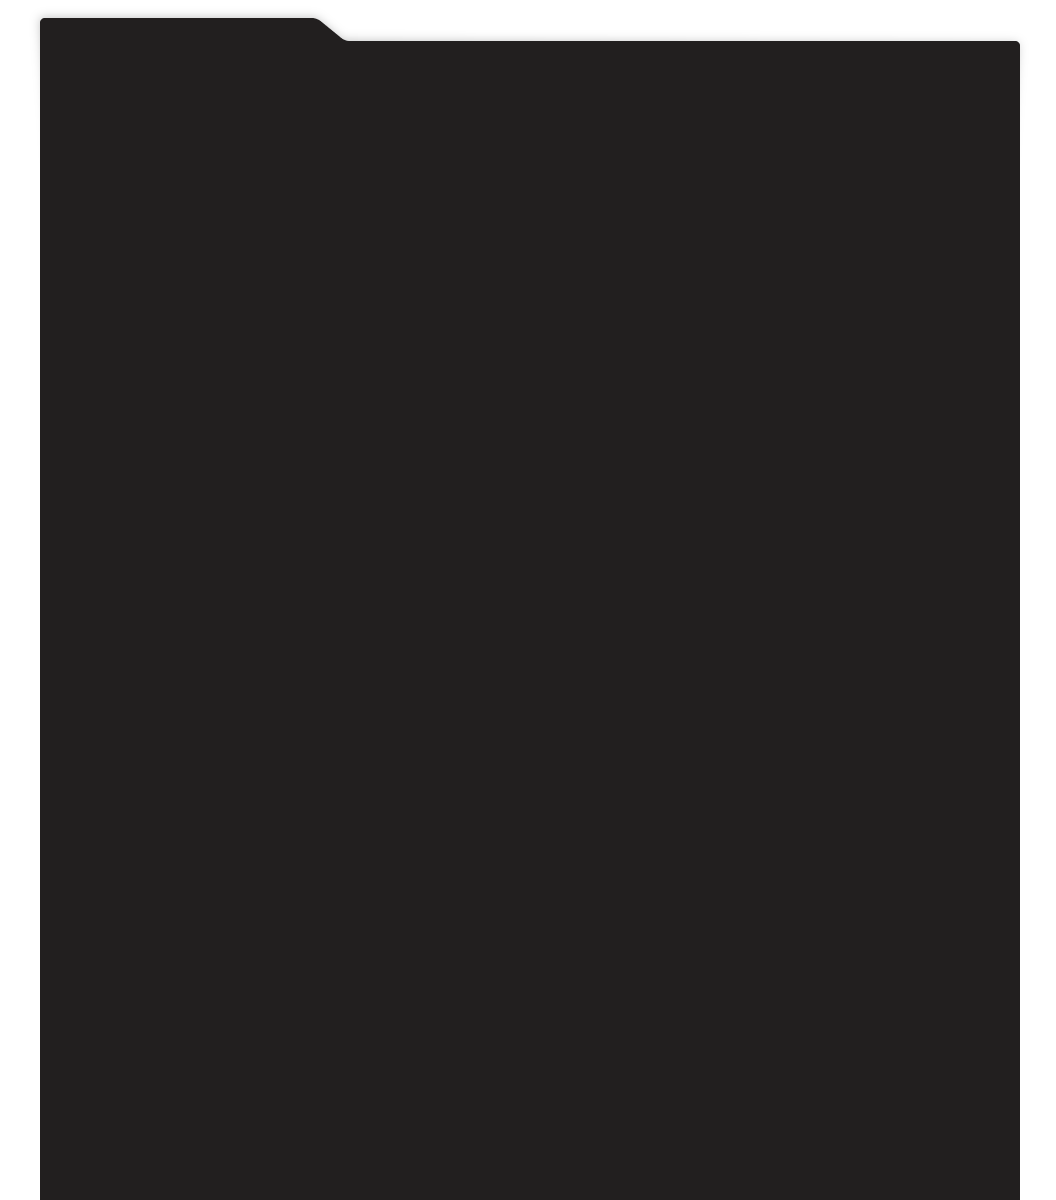
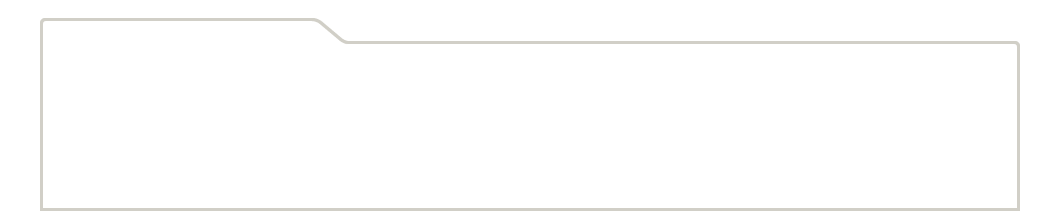
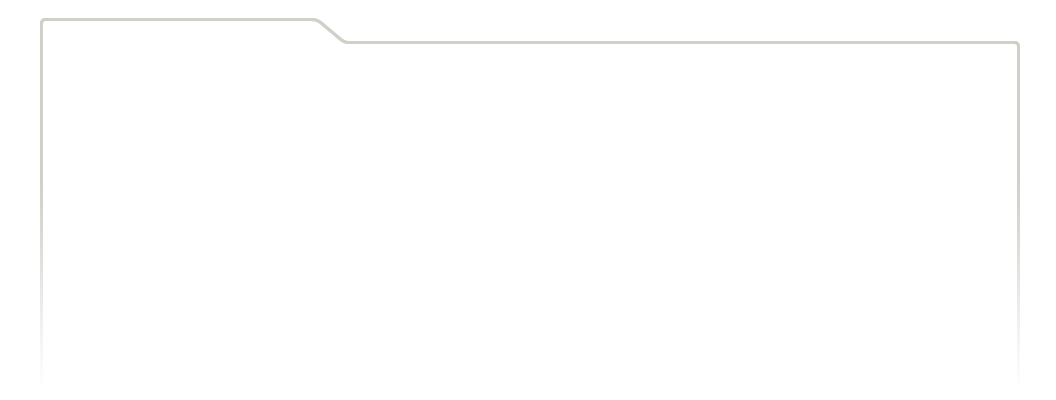
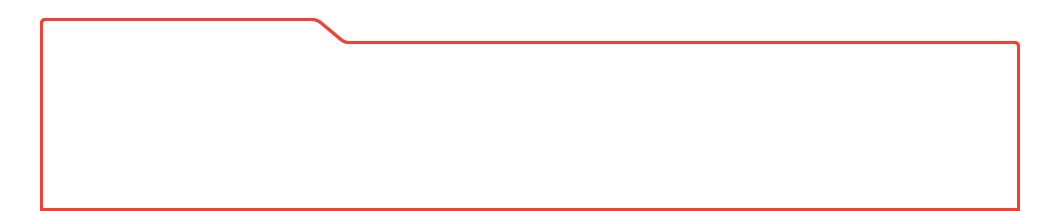
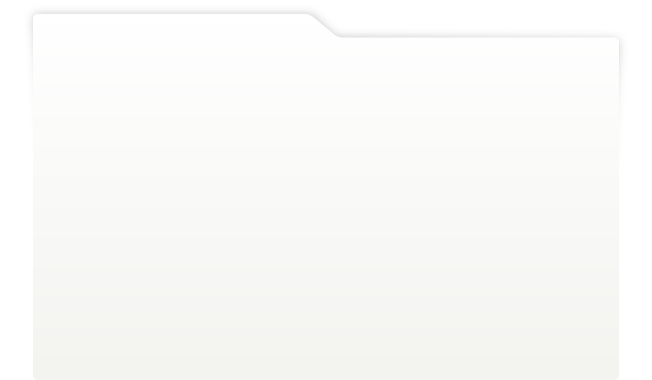
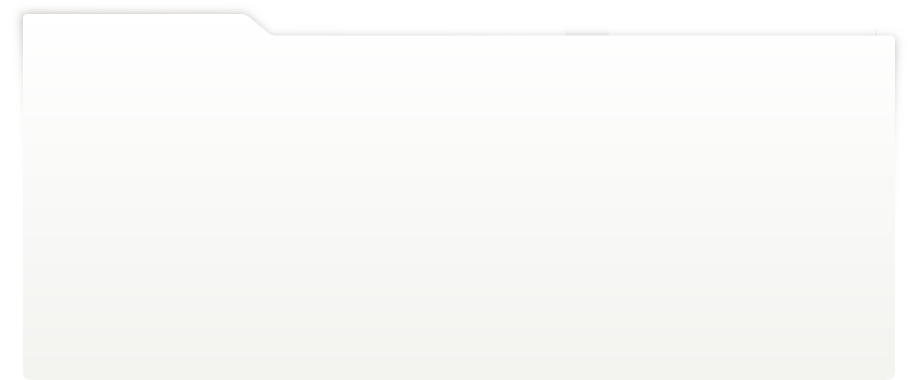
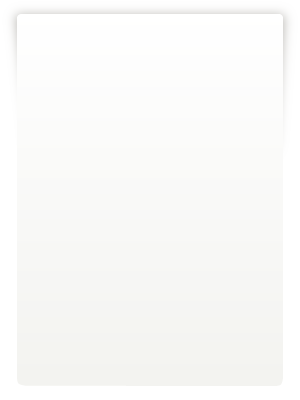
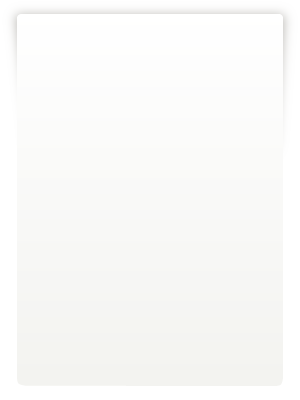
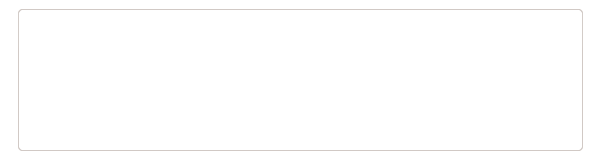
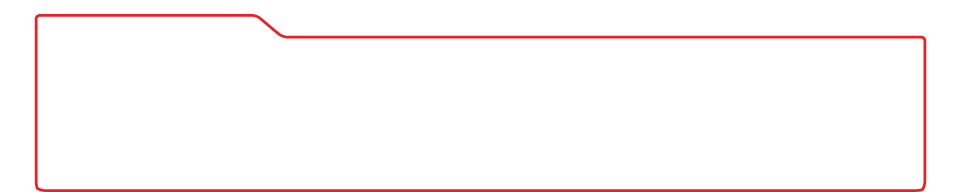
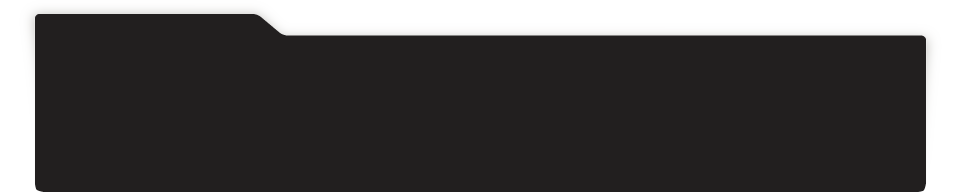
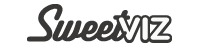
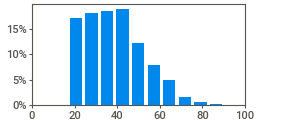
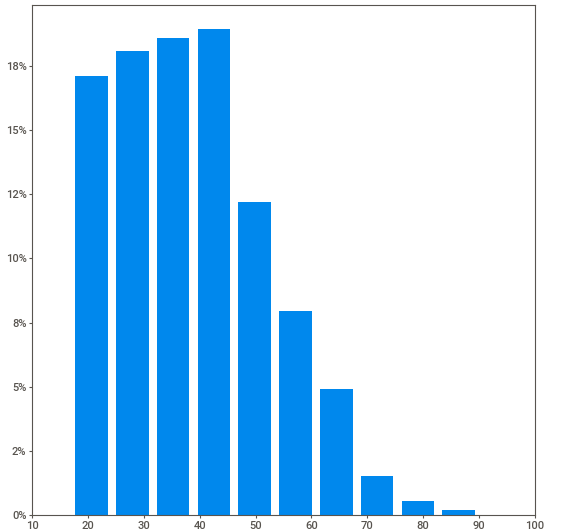
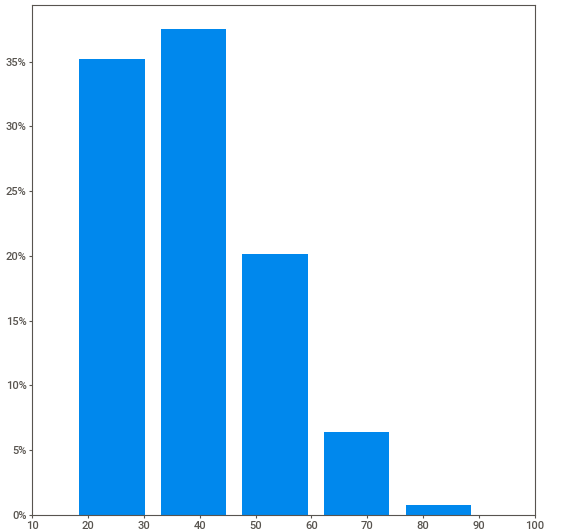
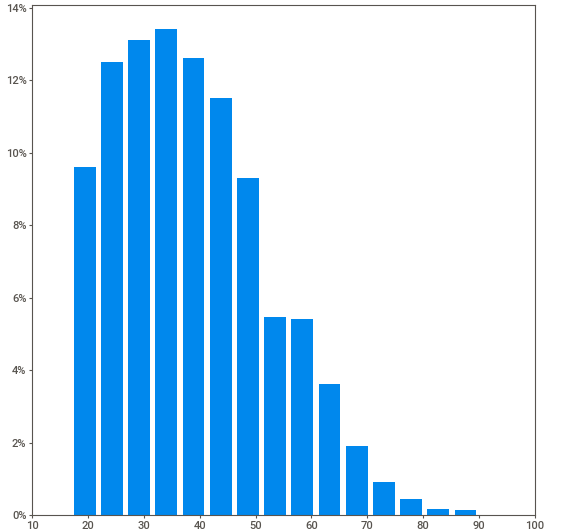
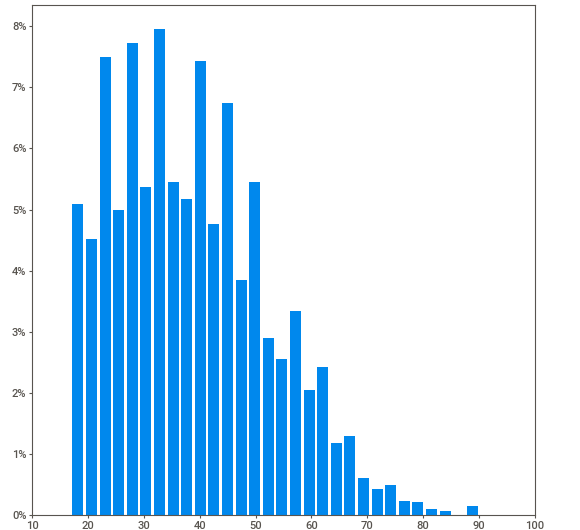
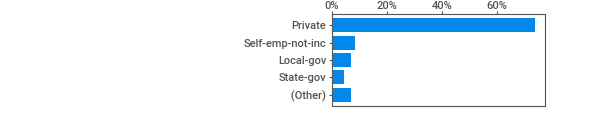
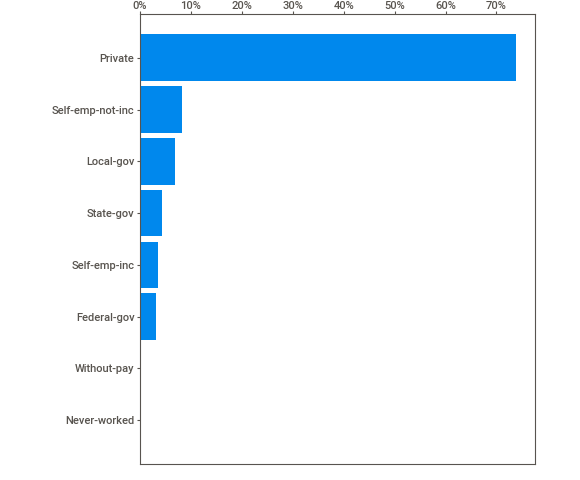
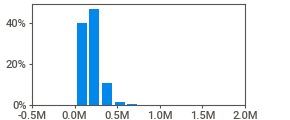
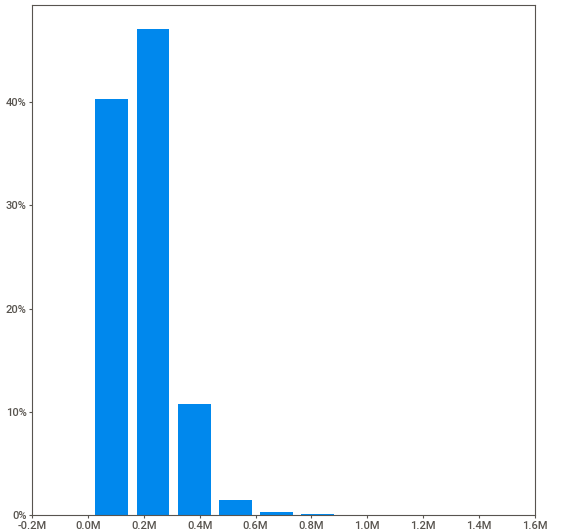
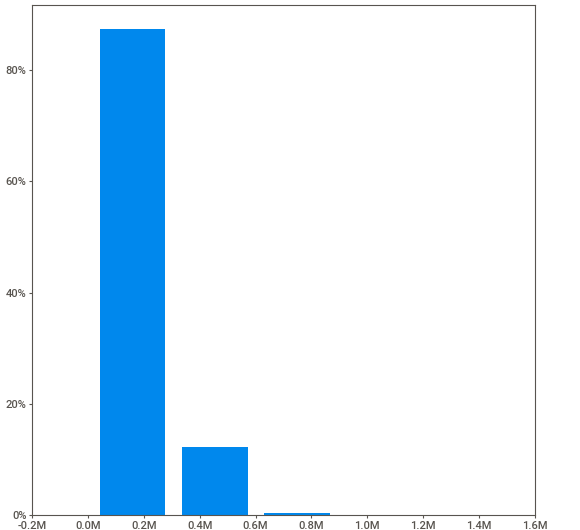
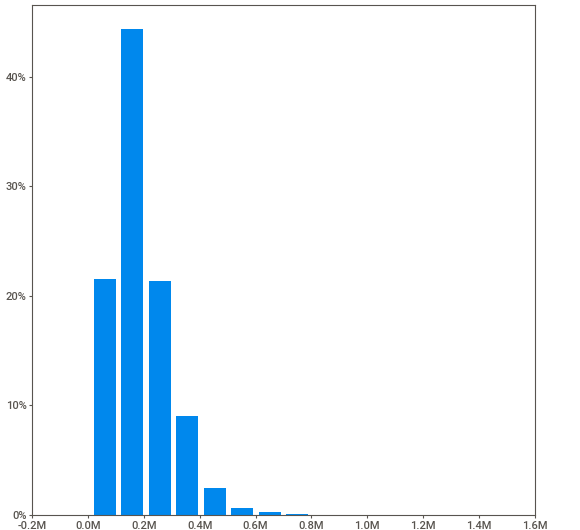
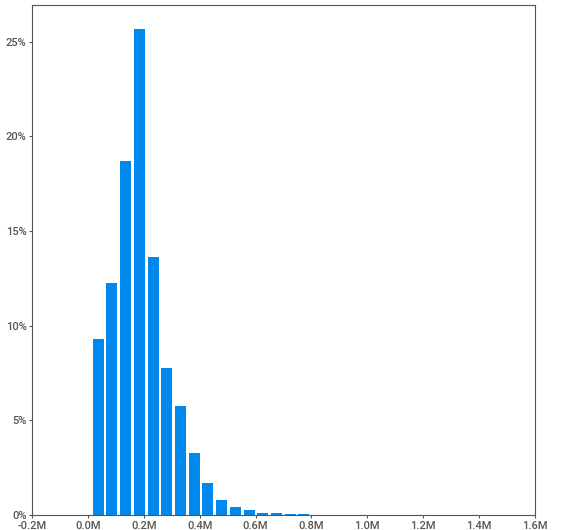
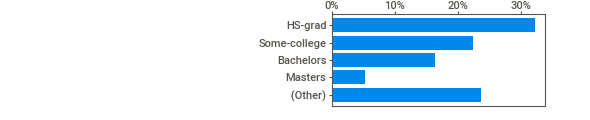
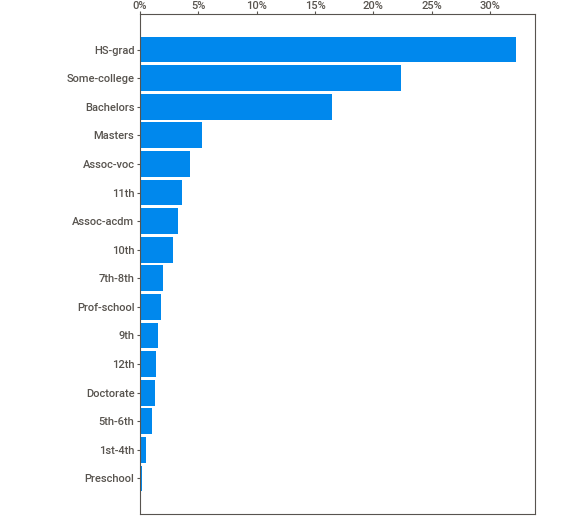
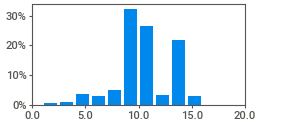
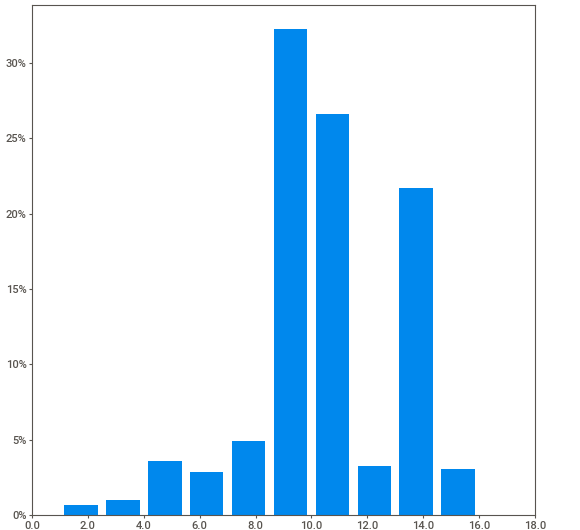
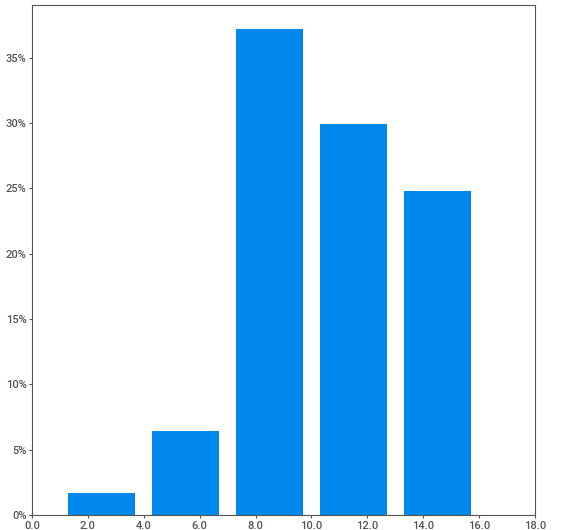
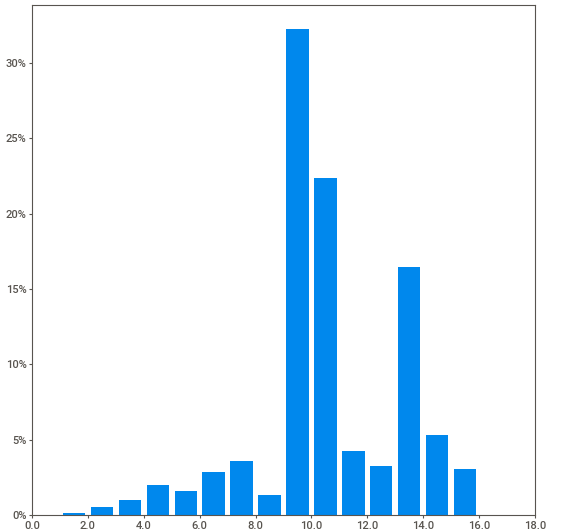
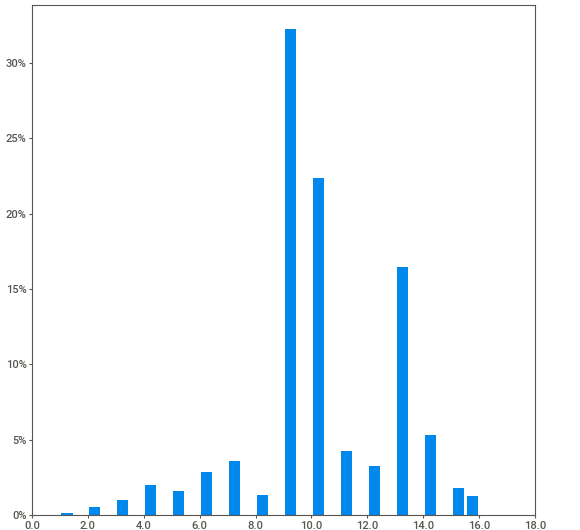
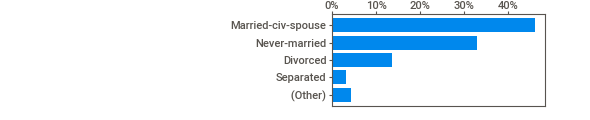
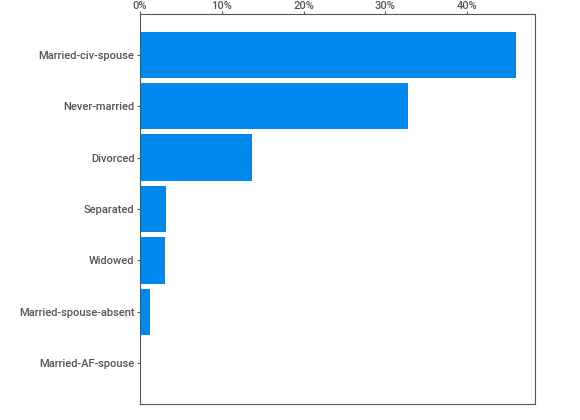
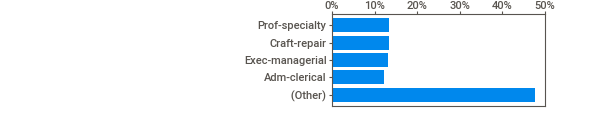
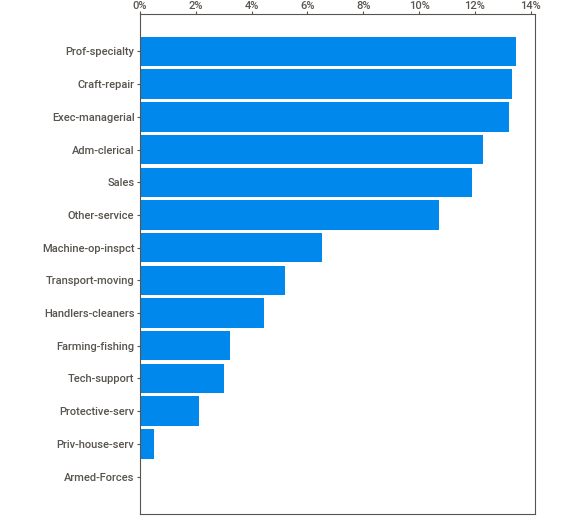
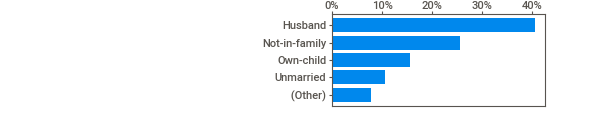
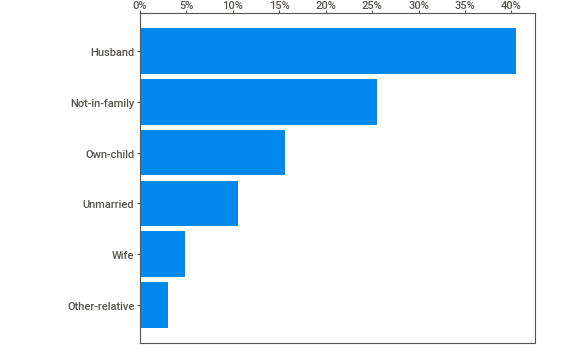
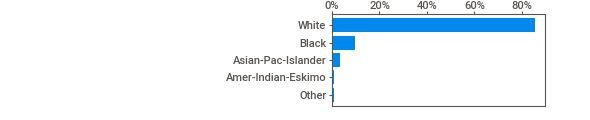
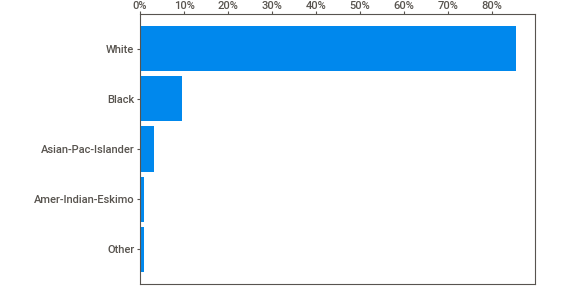
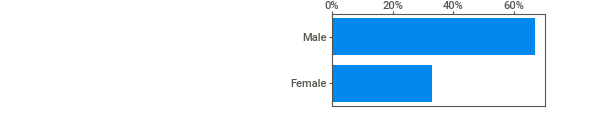
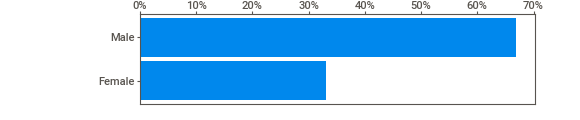
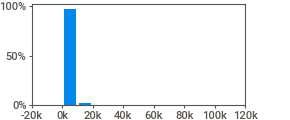
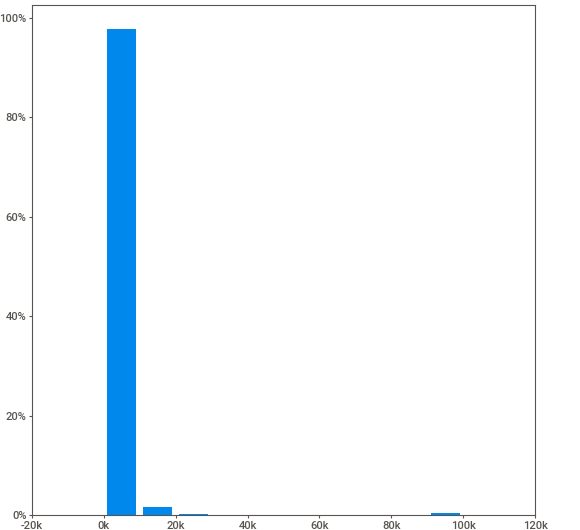
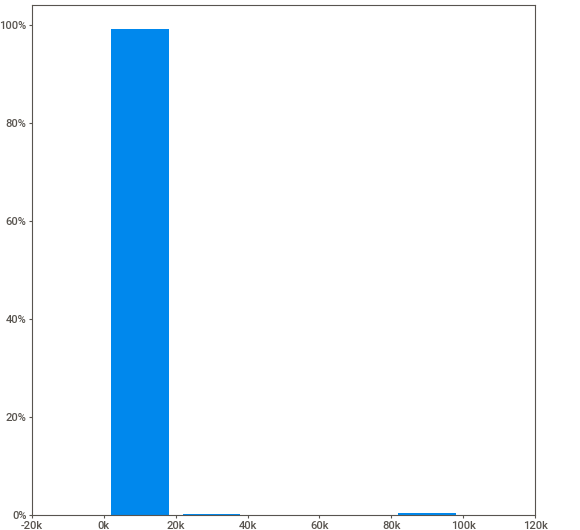
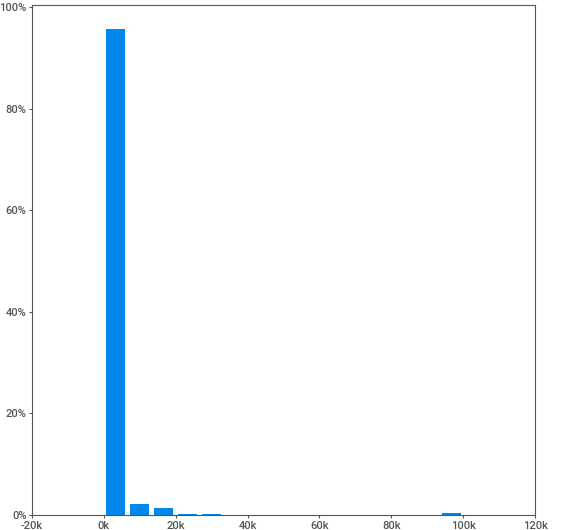
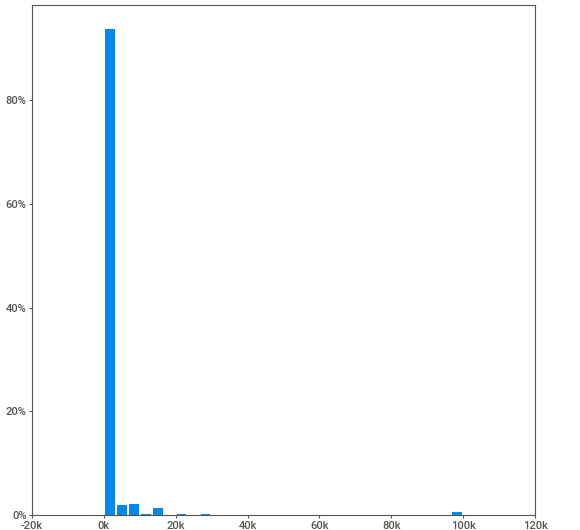
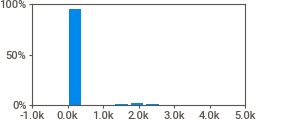
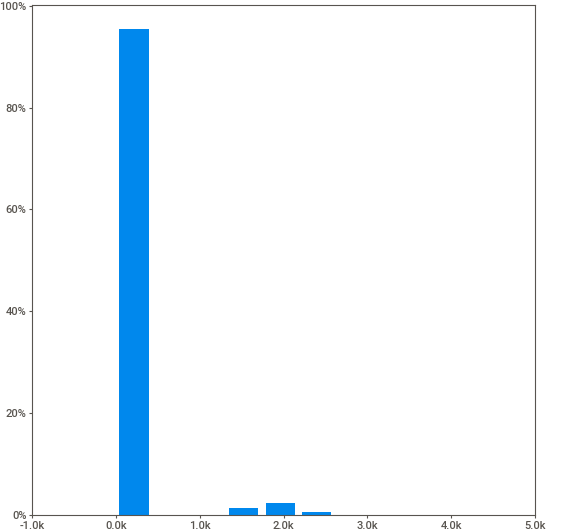
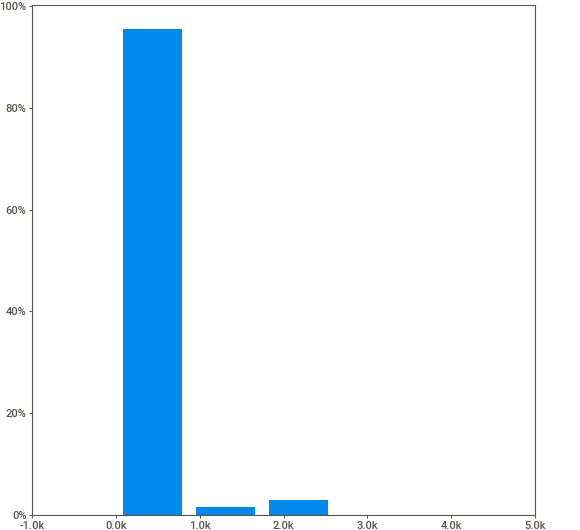
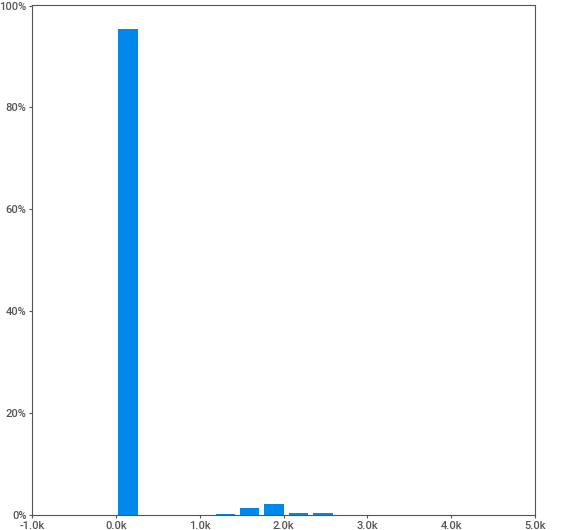
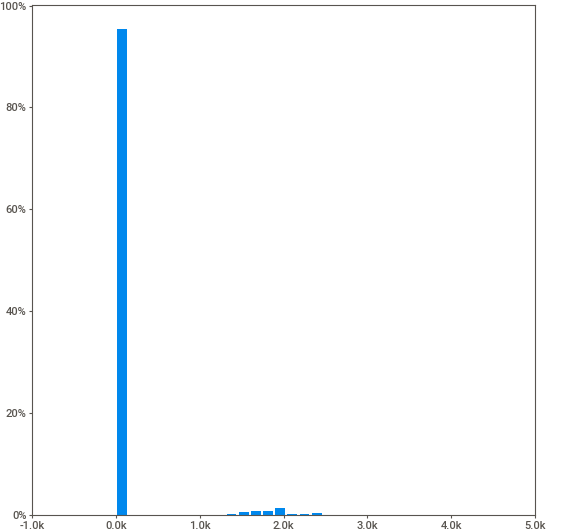
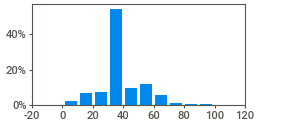
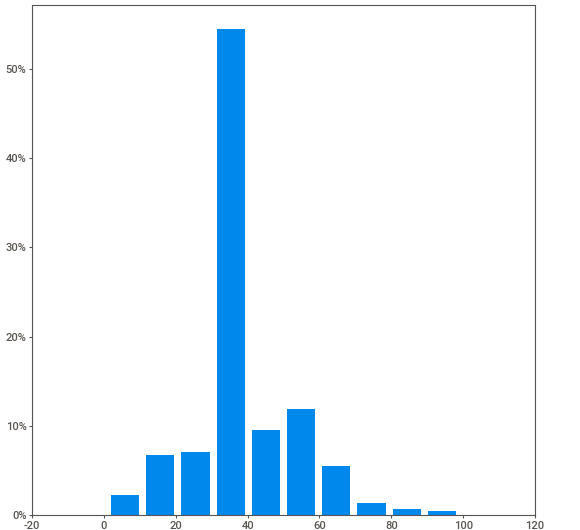
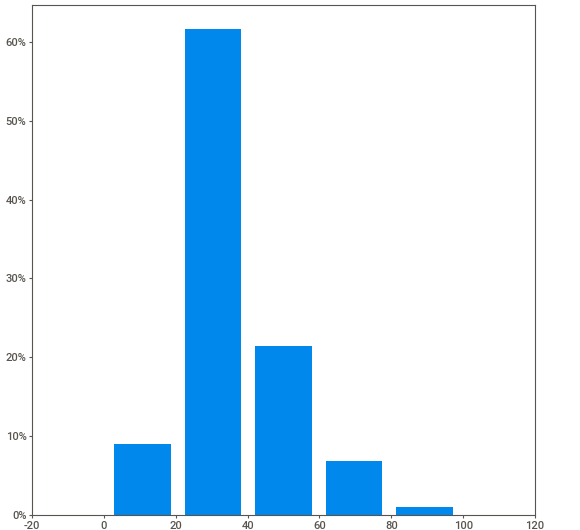
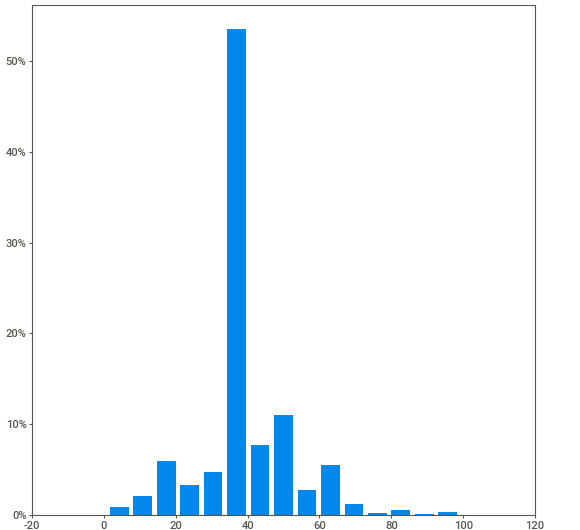
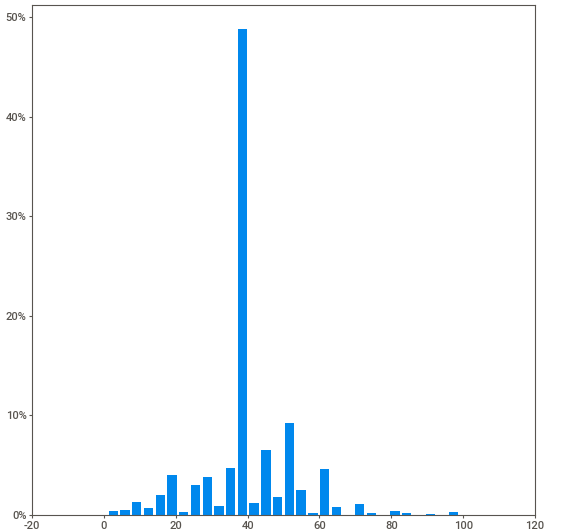
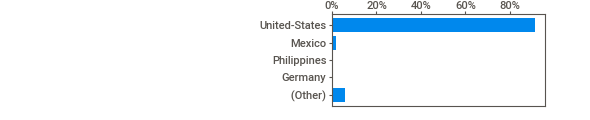
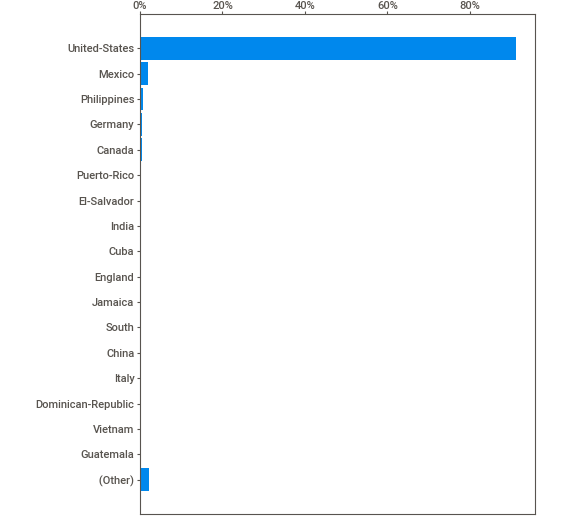
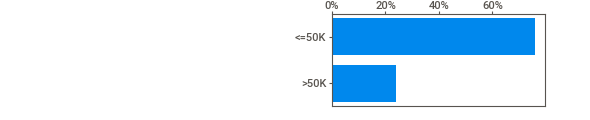
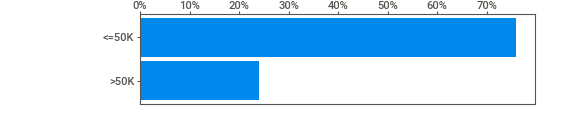
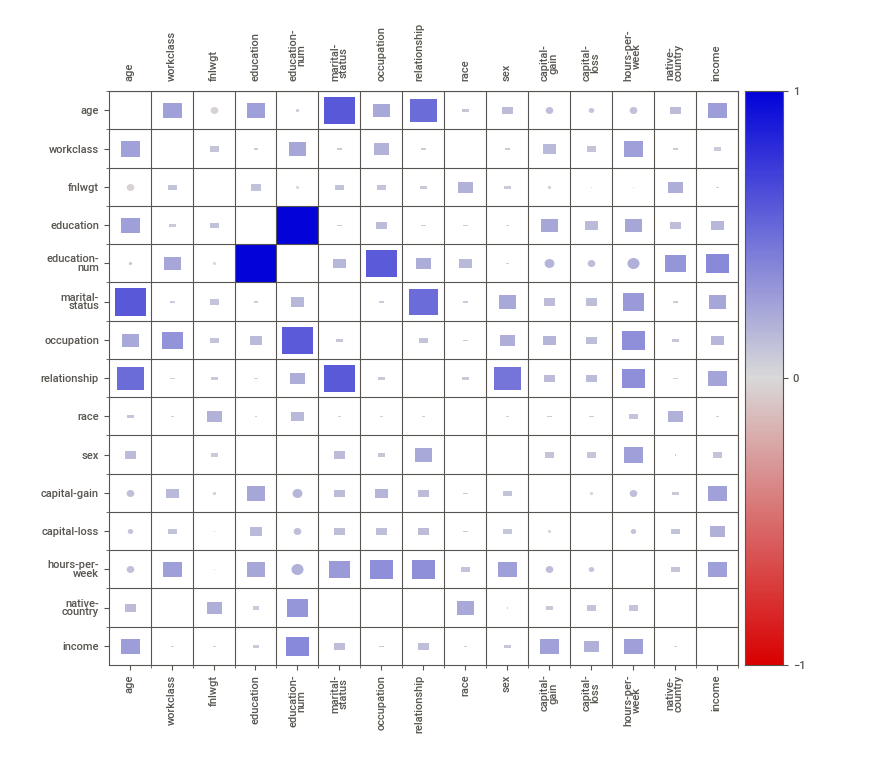
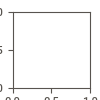

In [7]:
# we generate inline report
my_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


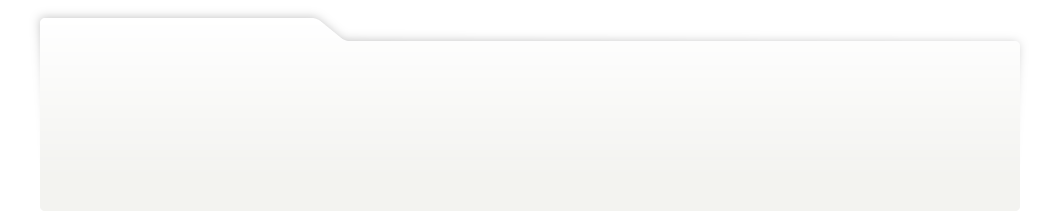
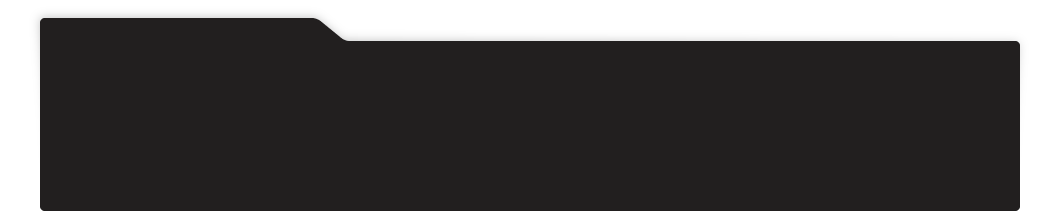
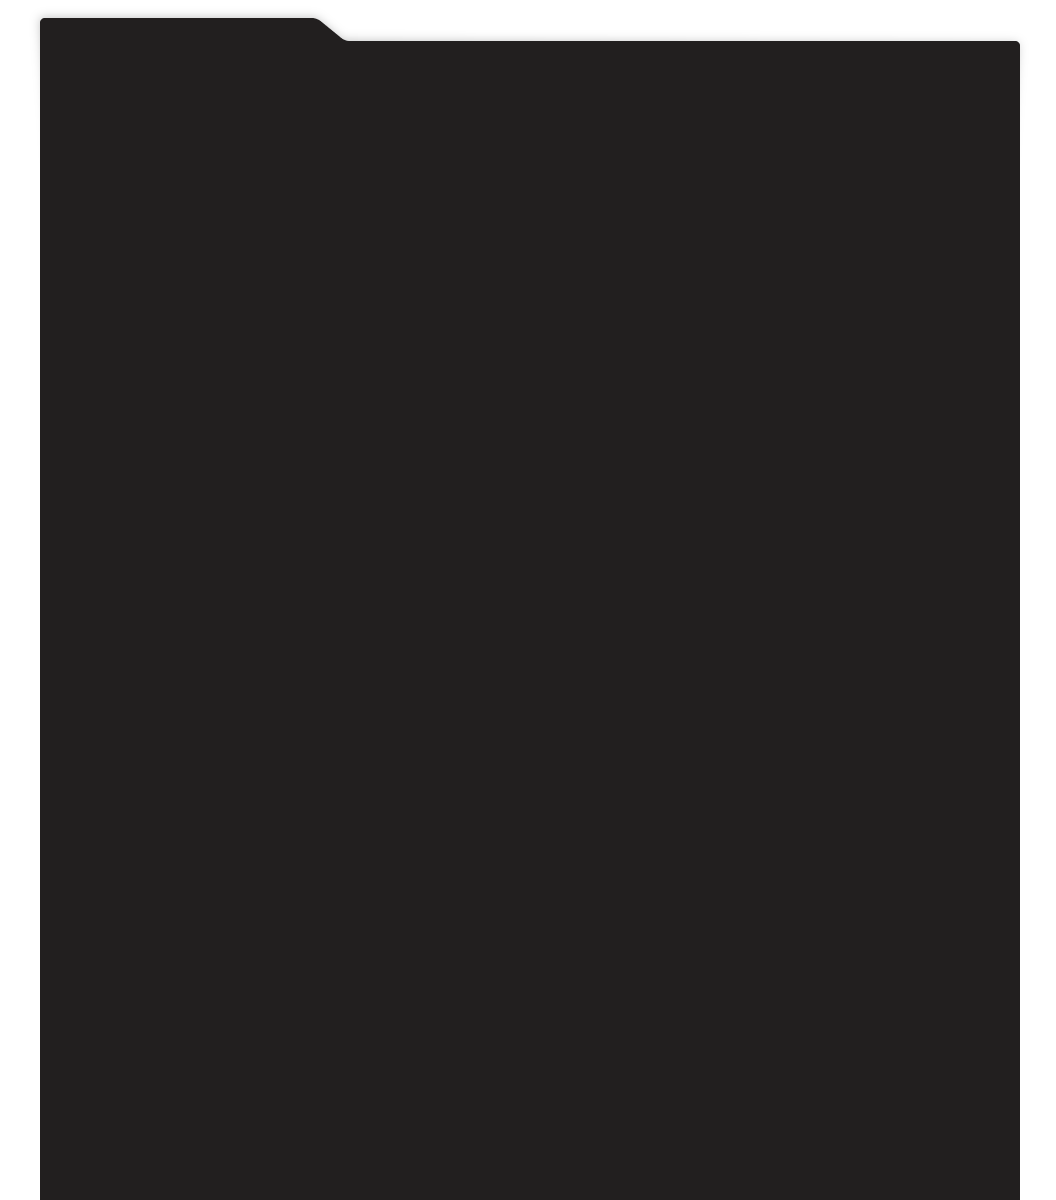
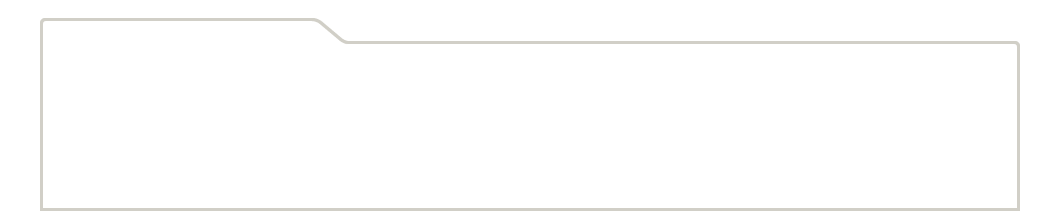
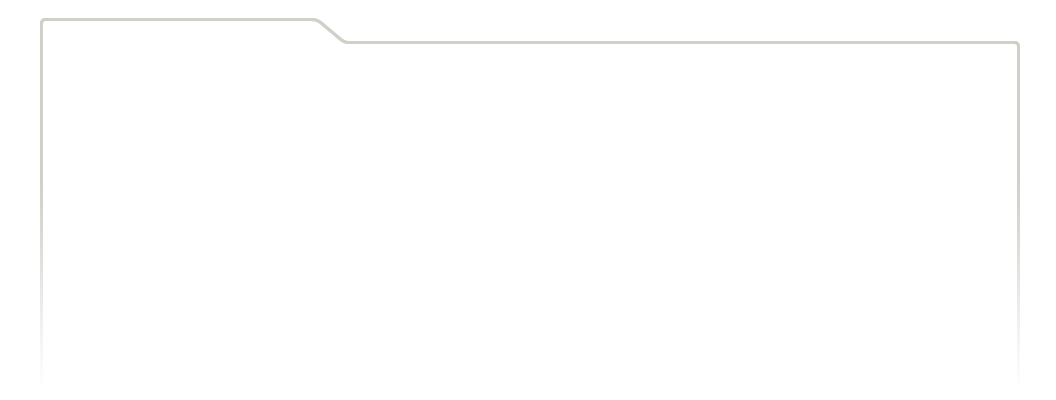
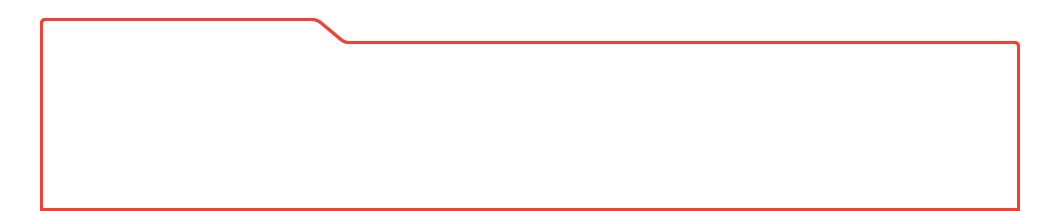
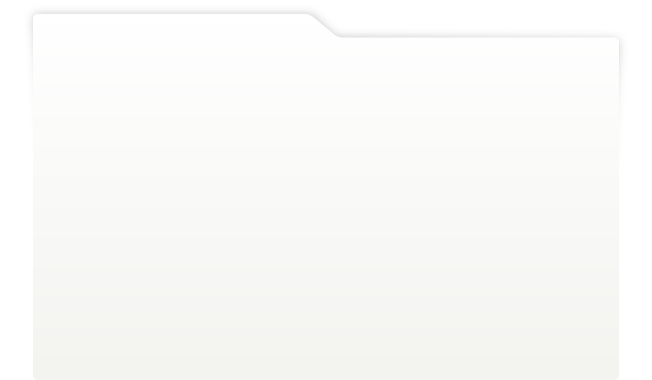
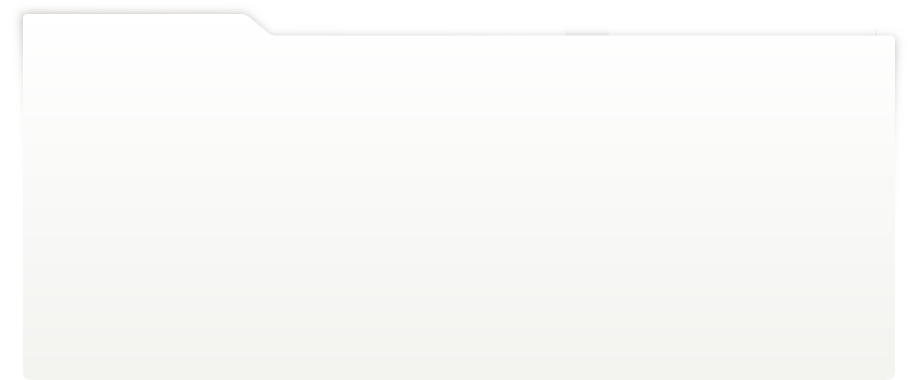
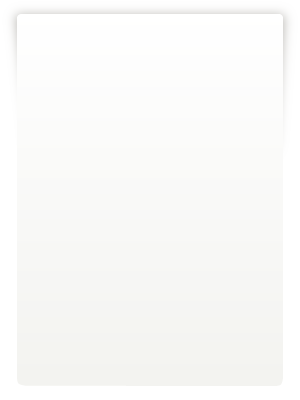
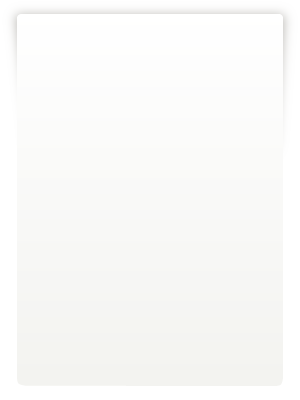
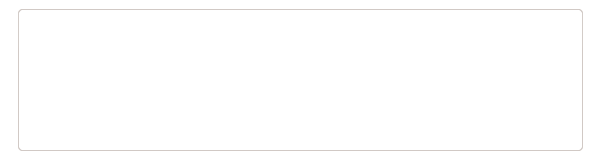
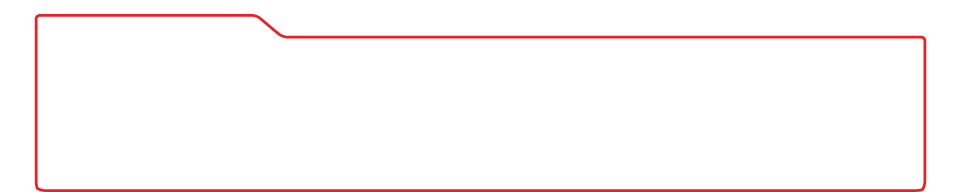
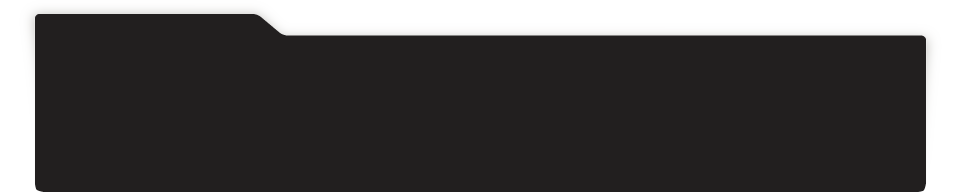
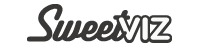
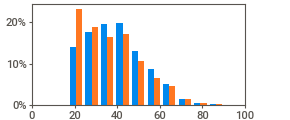
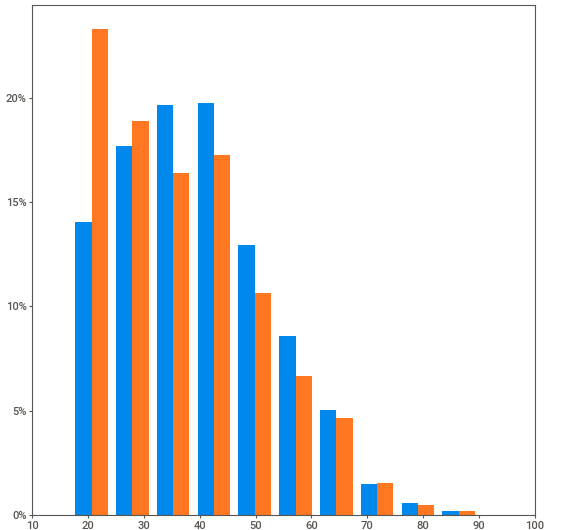
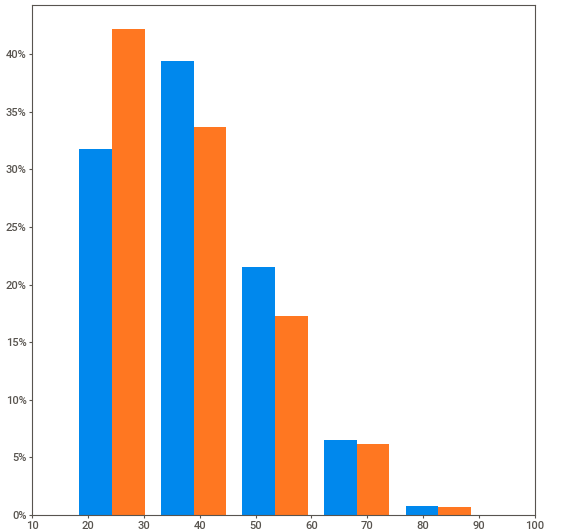
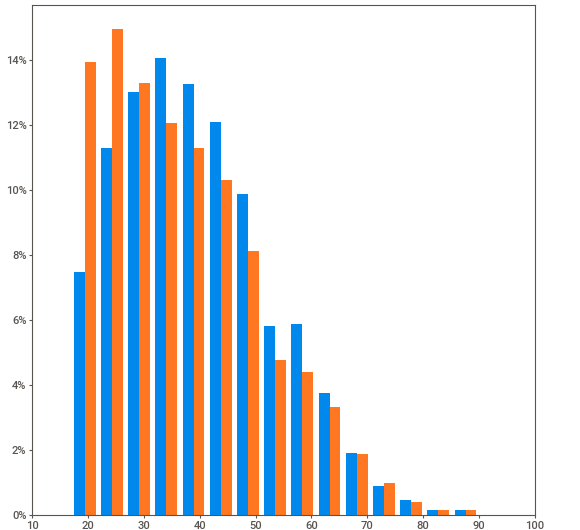
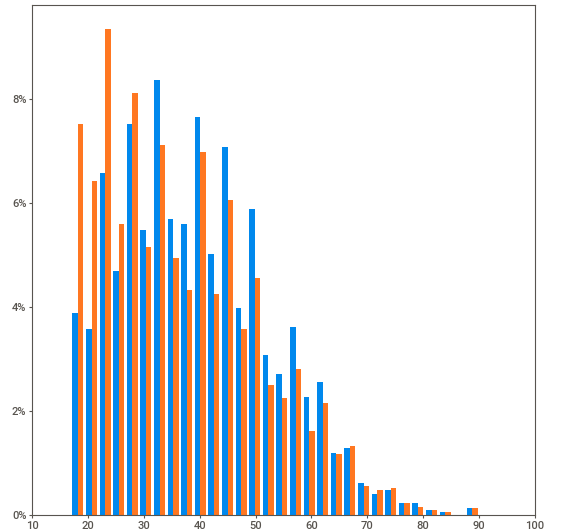
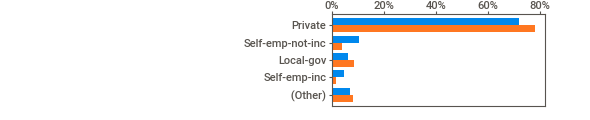
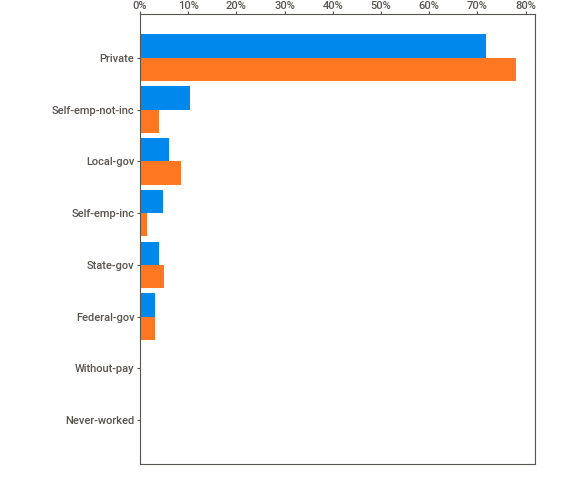
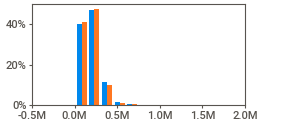
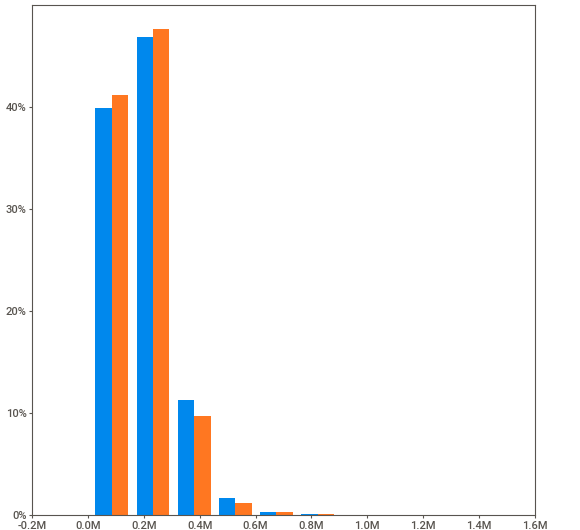
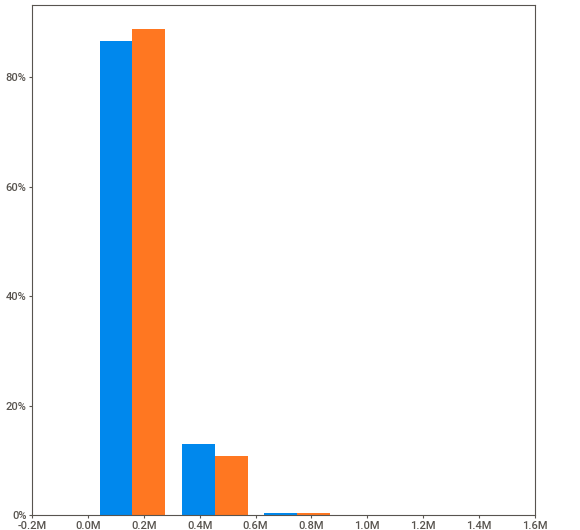
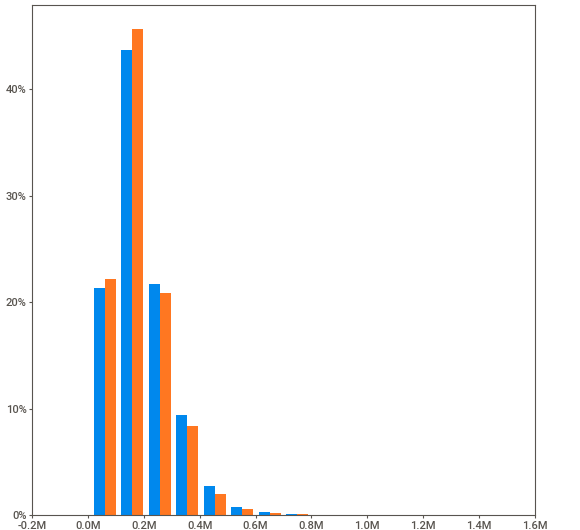
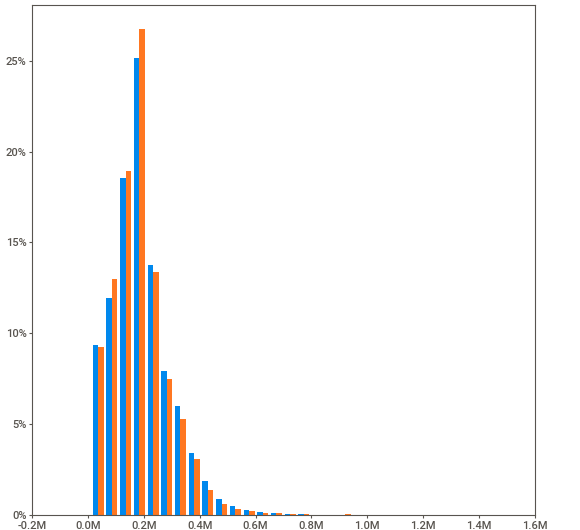
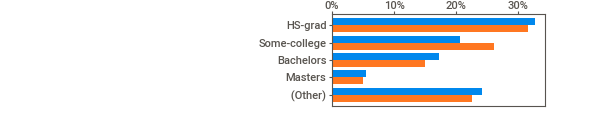
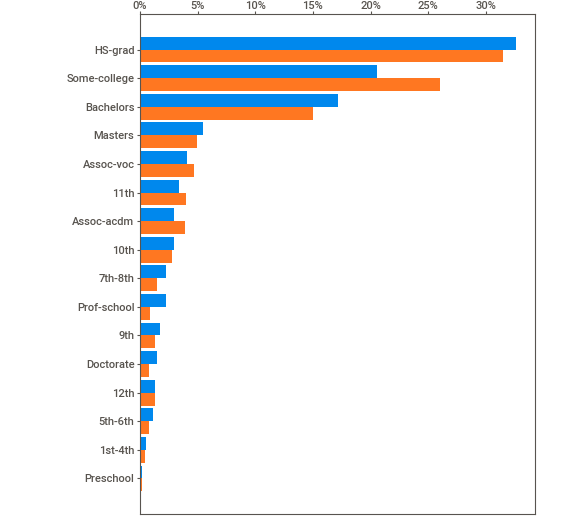
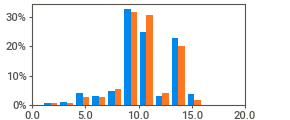
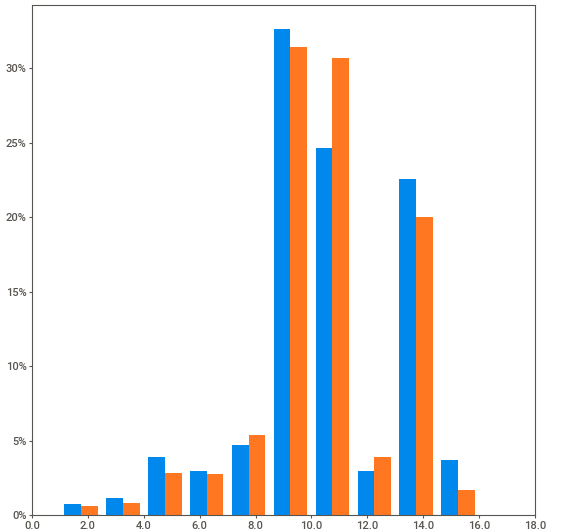
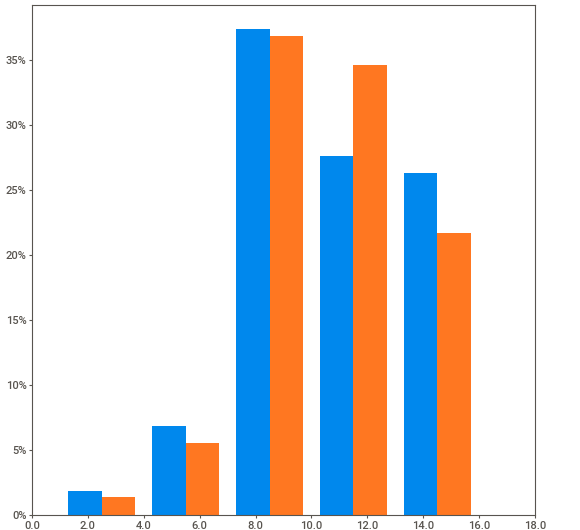
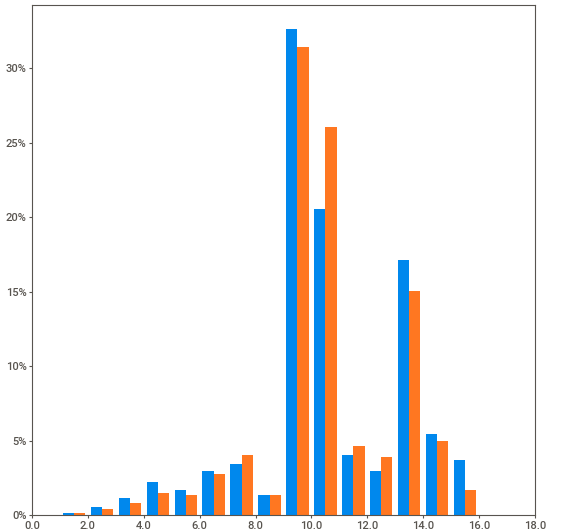
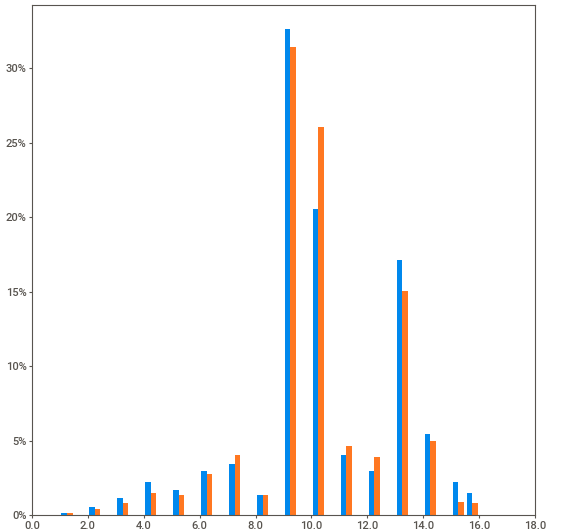
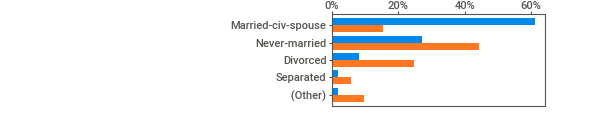
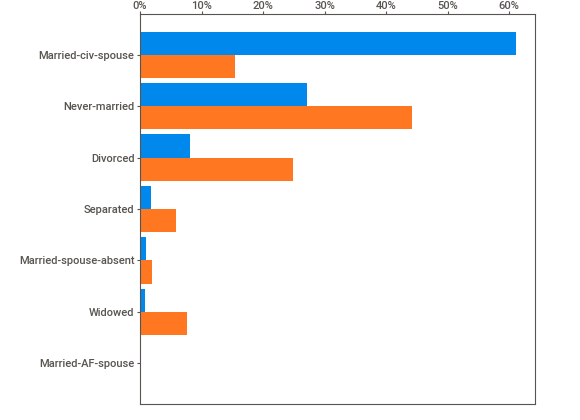
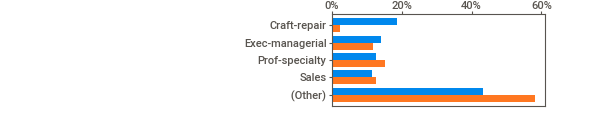
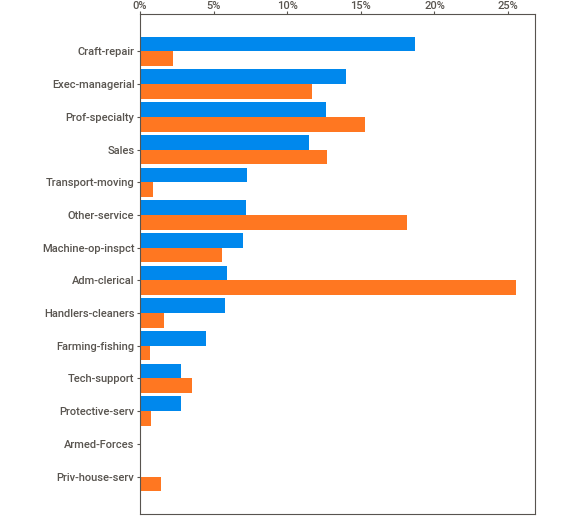
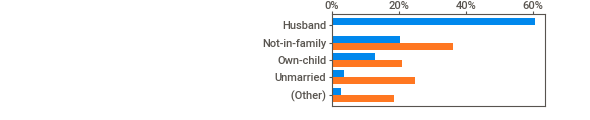
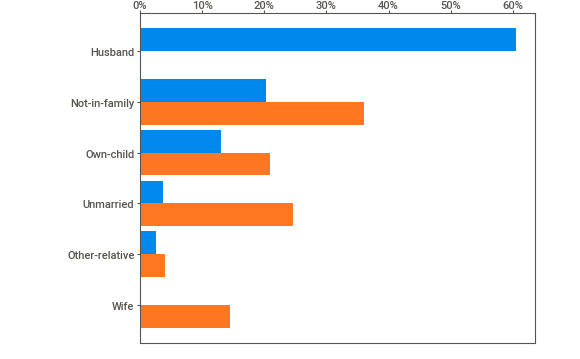
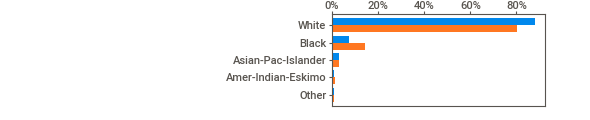
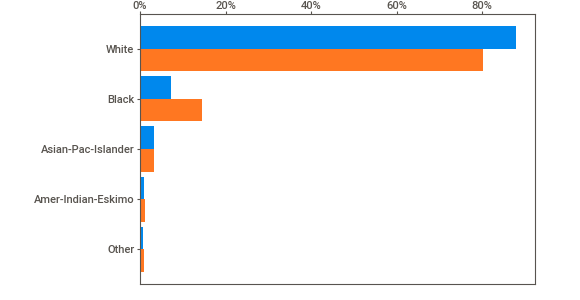
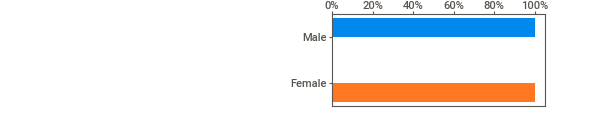
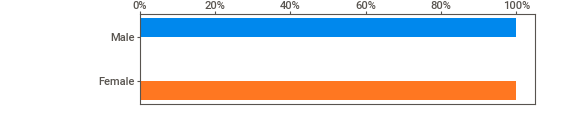
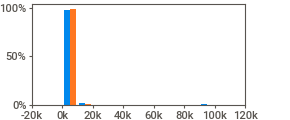
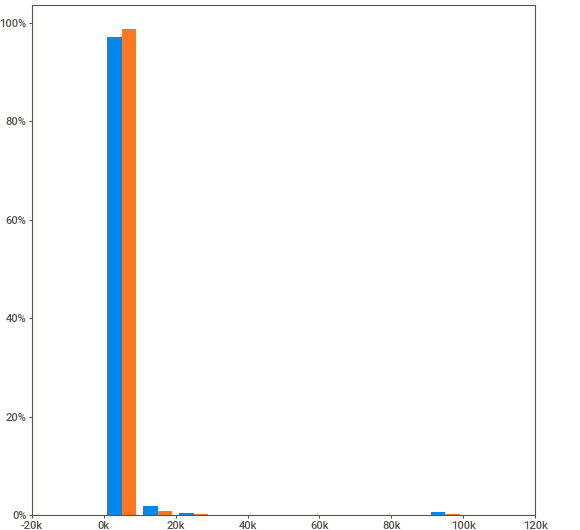
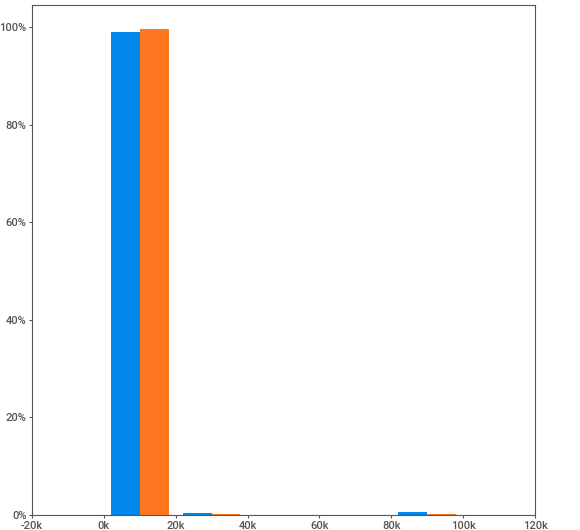
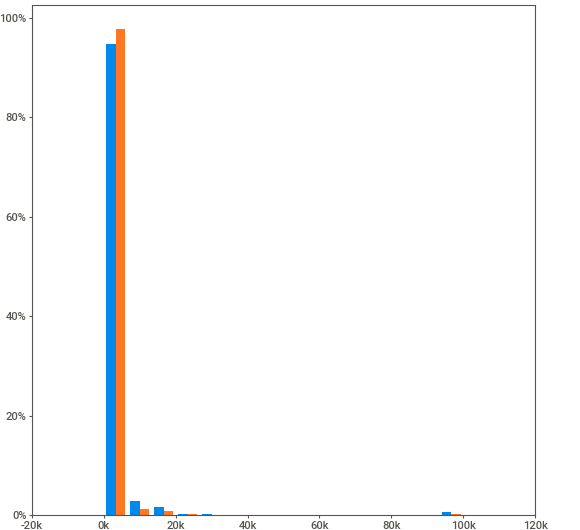
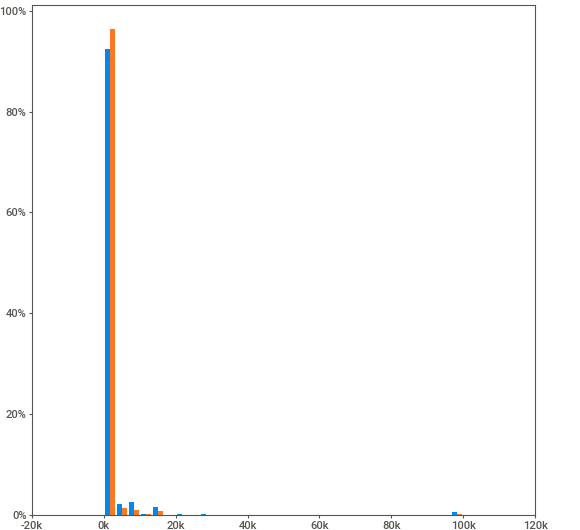
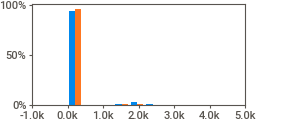
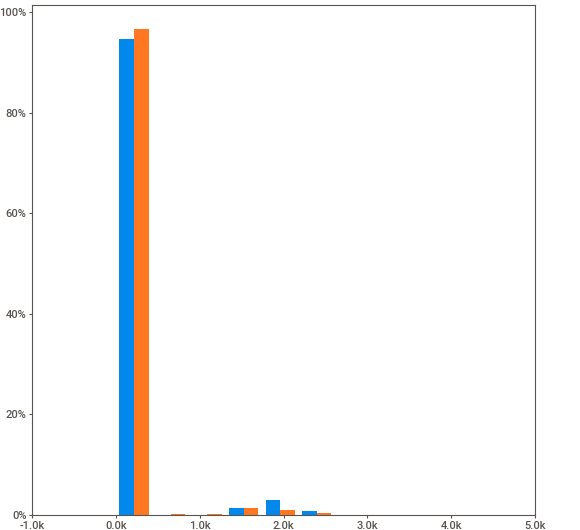
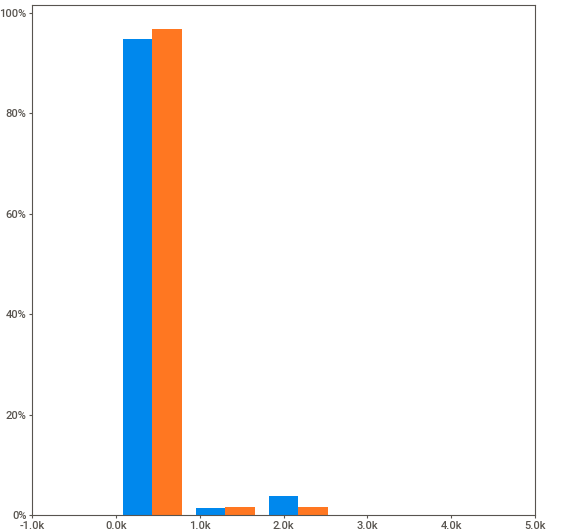
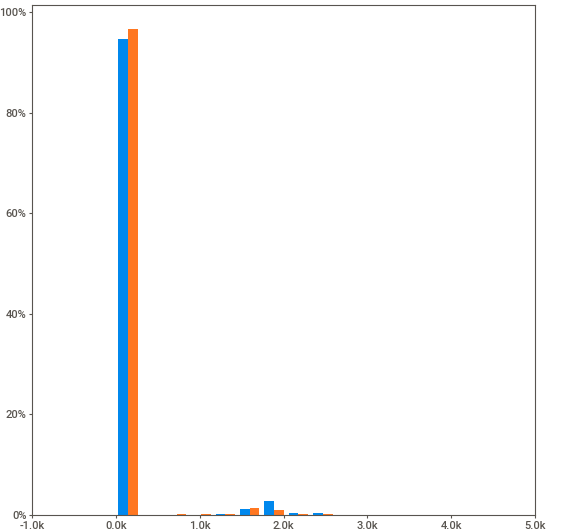
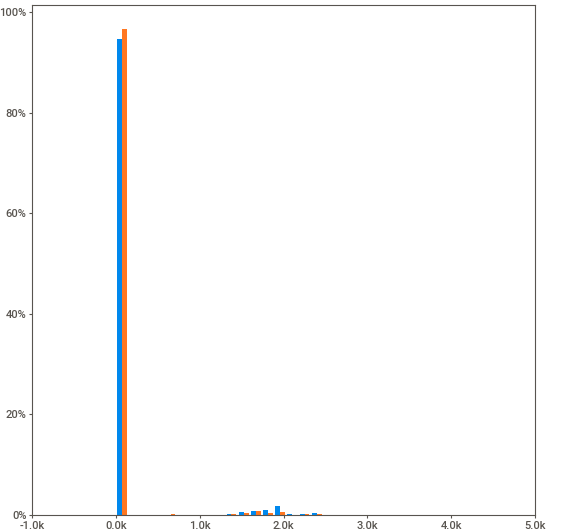
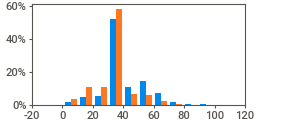
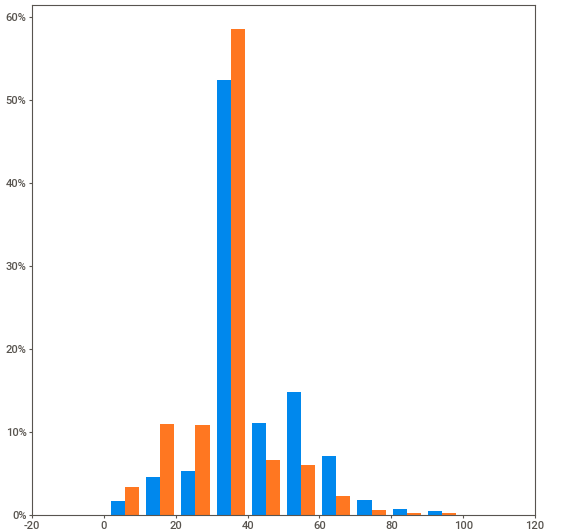
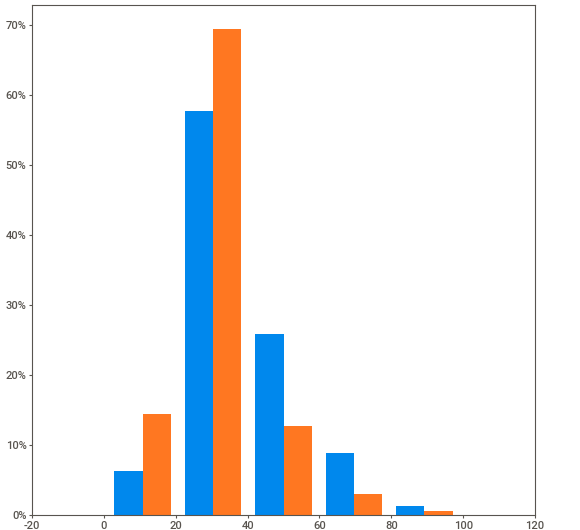
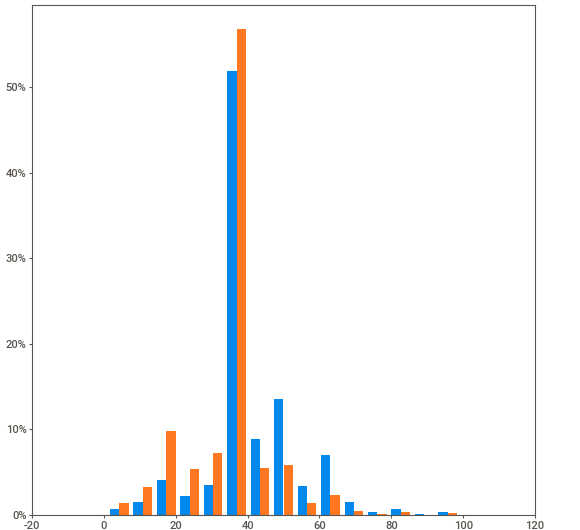
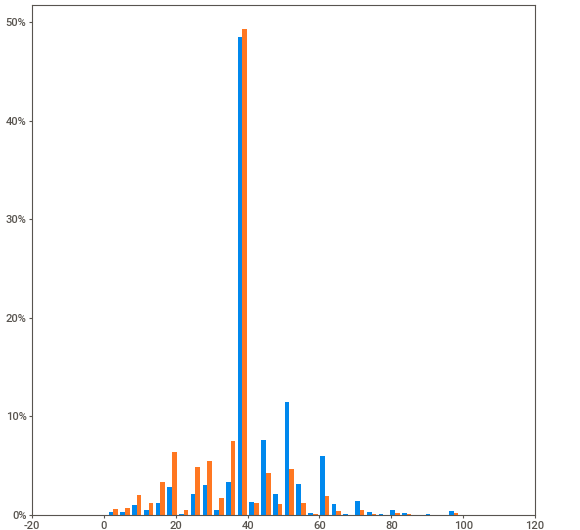
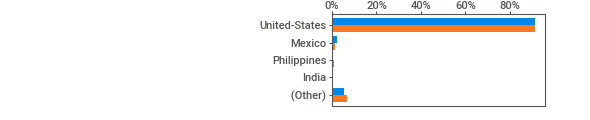
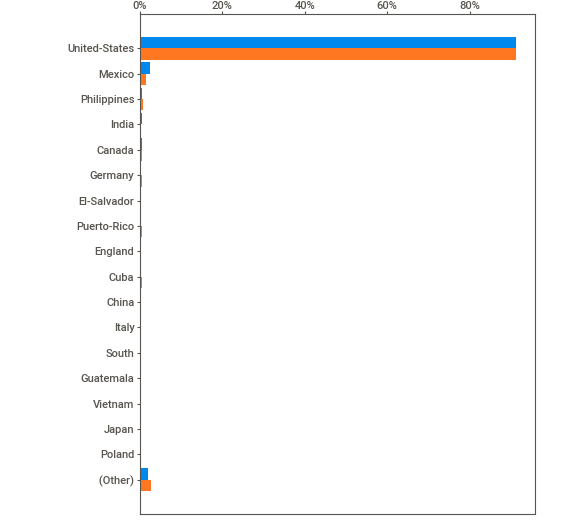
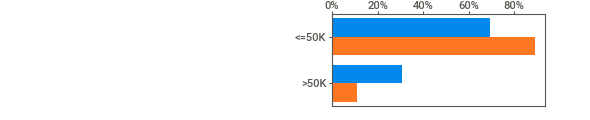
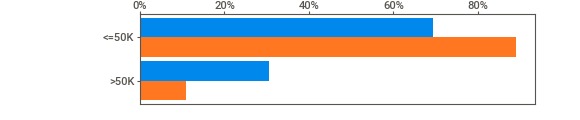
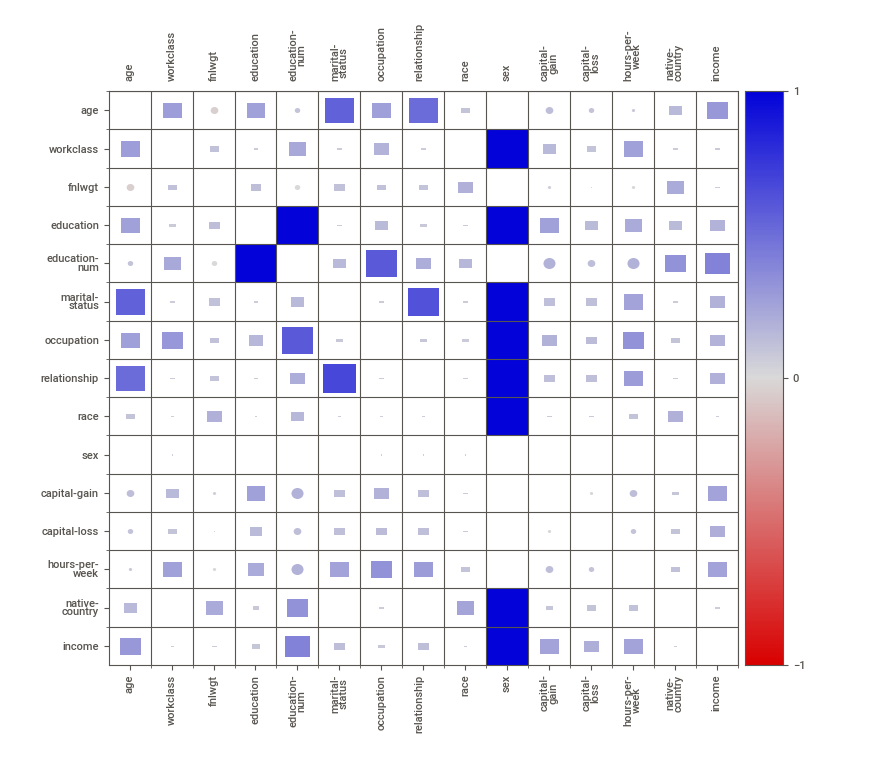
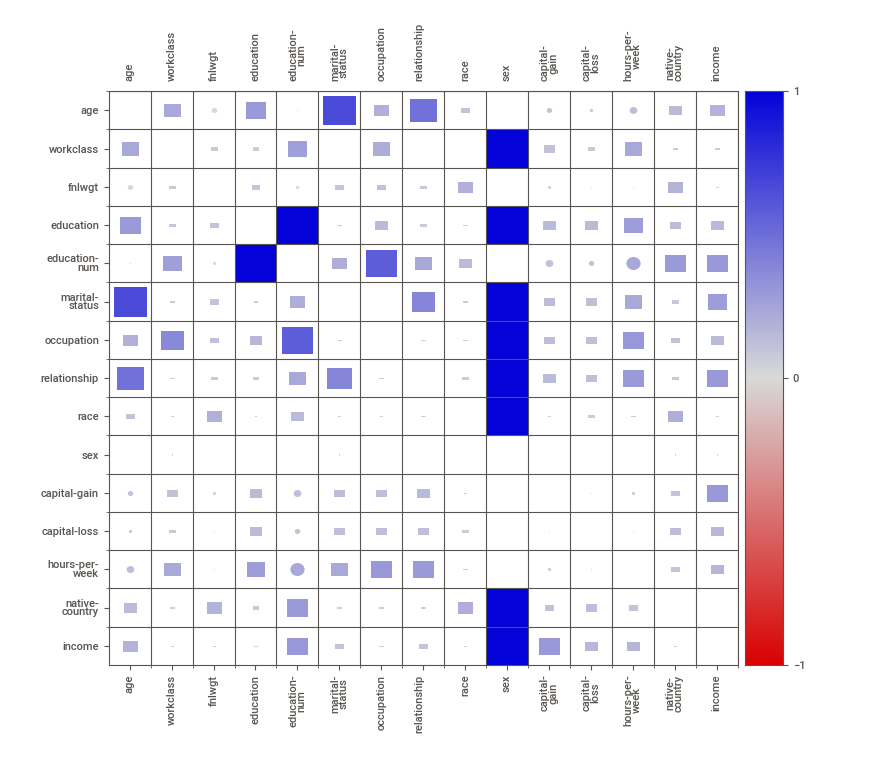

In [8]:
#my_report_intra = sv.compare_intra(df, df["sex"] == "Male", ["Male", "Female"])
#my_report_intra.show_notebook()

## YDATA  PROFILING
https://github.com/ydataai/ydata-profiling

In [ ]:
!pip install ydata_profiling
#!pip install matplotlib==3.1.3

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
#To generate a HTML report file, save the ProfileReport to an object and use the to_file() function:
profile.to_file("ydata_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#The HTML report can be directly embedded in a cell in a similar fashion:
profile.to_notebook_iframe()

# AUTOML

##TPOT
https://github.com/EpistasisLab/tpot

In [ ]:
!pip install tpot

In [ ]:
X_train1 = pd.get_dummies(X_train).values
X_test1 = pd.get_dummies(X_test).values
#X_train1 = X_train
#X_test1 = X_test

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=2, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train1, y_train)

Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8607698607698607

Generation 2 - Current best internal CV score: 0.8623259623259623

Best pipeline: GradientBoostingClassifier(RobustScaler(input_matrix), learning_rate=0.1, max_depth=3, max_features=0.8, min_samples_leaf=19, min_samples_split=5, n_estimators=100, subsample=0.45)


TPOTClassifier(generations=2, population_size=50, random_state=42, verbosity=2)

In [18]:
tpot.export('TPOTClassifier_pipeline.py')

## MLJAR
### https://github.com/mljar/mljar-supervised

In [ ]:
!pip install mljar-supervised

In [10]:
from supervised.automl import AutoML
#automl = AutoML(mode="Perform",results_path="AutoML_classifier")
automl = AutoML(mode="Explain",results_path="AutoML_classifier")
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_classifier
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
invalid value encountered in true_divide
1_Baseline logloss 0.552548 trained in 1.32 seconds
2_DecisionTree logloss 0.373436 trained in 21.73 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 0.281788 trained in 13.2 seconds
There was an error during 4_Default_NeuralNetwork training.
Please check AutoML_classifier/errors.md for details.
5_Default_RandomForest logloss 0.34504 trained in 14.68 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.281788 trained in 1.72 seconds
AutoML fit time: 76.65 seconds
AutoML best model: 3_De

AutoML(results_path='AutoML_classifier')

In [11]:
y_predicted = automl.predict(X_test)
y_predicted

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.8724972362117676

In [13]:
#print(automl.score(X_test1, y_test))

In [14]:
pd.read_csv('/content/AutoML_classifier/leaderboard.csv')

name     model_type metric_type  metric_value  train_time
0              1_Baseline       Baseline     logloss      0.552548        3.25
1          2_DecisionTree  Decision Tree     logloss      0.373436       23.83
2       3_Default_Xgboost        Xgboost     logloss      0.281788       15.32
3  5_Default_RandomForest  Random Forest     logloss      0.345040       16.81
4                Ensemble       Ensemble     logloss      0.281788        1.72

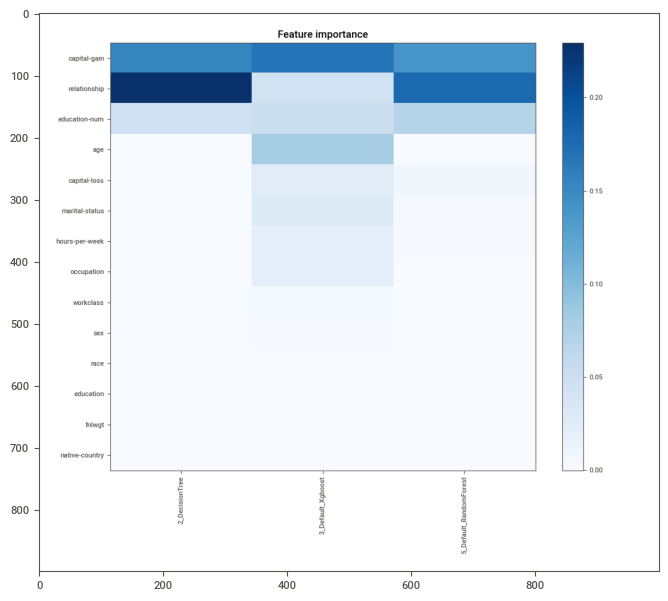

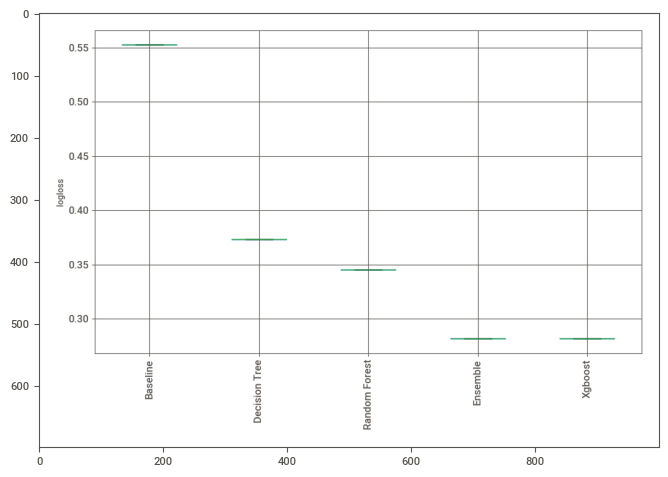

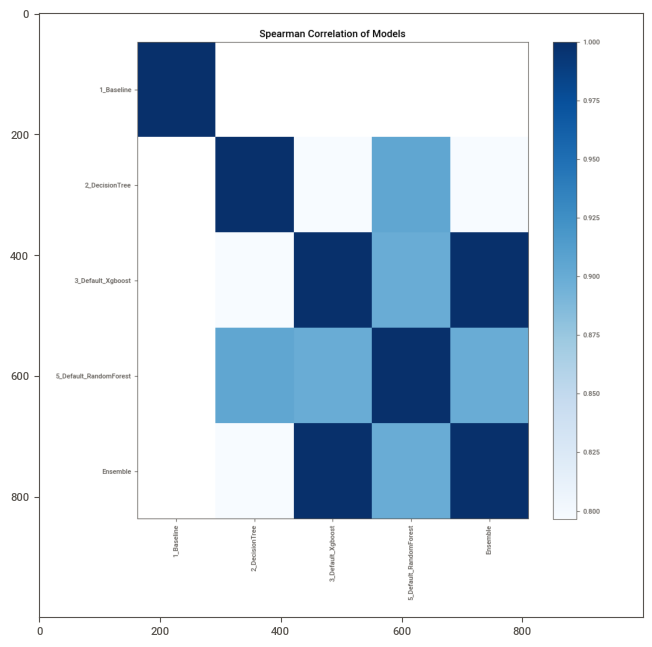

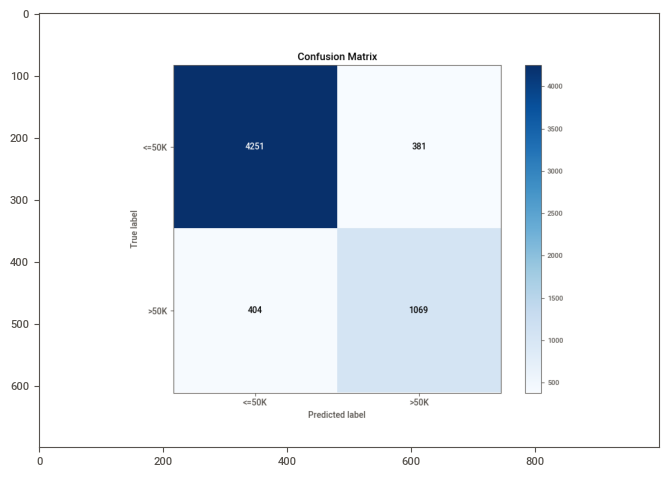

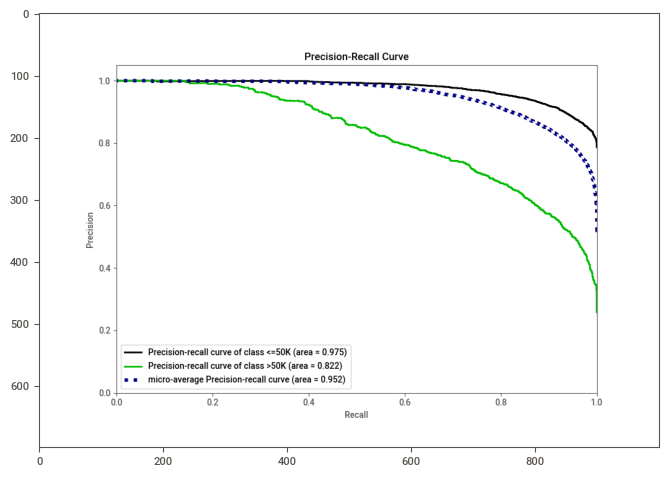

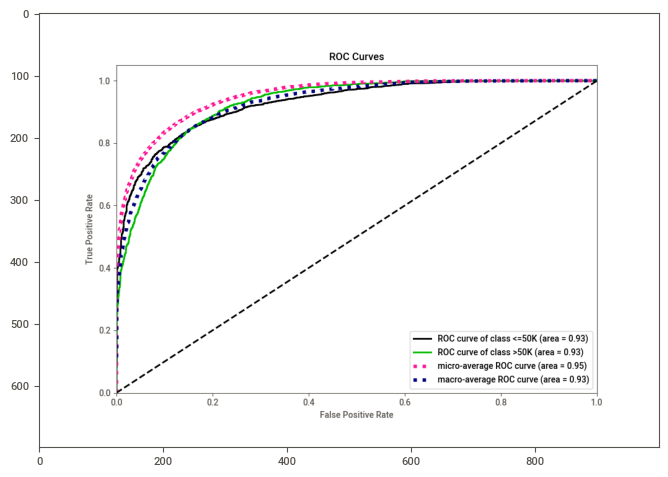

In [15]:
import imageio

def show_image(file):
  im=imageio.imread(file)
  plt.figure(figsize=(8,8))
  plt.imshow(im)
  plt.show()

show_image('/content/AutoML_classifier/features_heatmap.png')
show_image('/content/AutoML_classifier/ldb_performance_boxplot.png')
show_image('/content/AutoML_classifier/correlation_heatmap.png')
show_image('/content/AutoML_classifier/Ensemble/confusion_matrix.png')
show_image('/content/AutoML_classifier/Ensemble/precision_recall_curve.png')
show_image('/content/AutoML_classifier/Ensemble/roc_curve.png')
#show_image('/content/AutoML_classifier/38_CatBoost/permutation_importance.png')

# PYCARET
### https://pycaret.gitbook.io/docs/

In [ ]:
#!pip install -U scikit-learn==0.23.2
#!pip install --use-deprecated=legacy-resolver pycaret[full]

In [ ]:
#from pycaret.classification import *
#s = setup(df, target = target)

In [ ]:
#best = compare_models()

In [31]:
#print(best)
#plot_model(best)

In [32]:
#evaluate_model(best)

## LAZYPREDICT
https://lazypredict.readthedocs.io/en/latest/

In [ ]:
!pip install lazypredict[full]

In [17]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [02:37<00:00,  5.43s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.87               0.81    None      0.87   
RandomForestClassifier             0.86               0.78    None      0.86   
AdaBoostClassifier                 0.86               0.78    None      0.86   
ExtraTreesClassifier               0.84               0.77    None      0.84   
GaussianNB                         0.69               0.77    None      0.71   
BaggingClassifier                  0.85               0.77    None      0.85   
LogisticRegression                 0.85               0.76    None      0.84   
CalibratedClassifierCV             0.85               0.76    None      0.85   
DecisionTreeClassifier             0.81               0.75    None      0.82   
KNeighborsClassifier               0.83               0.75    None      0.83   
BernoulliNB                        0.73               0.75    None      0.75   
Perceptron                         0.85               0.75    None      0.84   
LinearDiscriminantAnalysis         0.84               0.74    None      0.83   
ExtraTreeClassifier                0.80               0.73    None      0.80   
RidgeClassifier                    0.84               0.72    None      0.83   
RidgeClassifierCV                  0.84               0.72    None      0.83   
SVC                                0.84               0.71    None      0.83   
PassiveAggressiveClassifier        0.84               0.70    None      0.82   
NearestCentroid                    0.62               0.67    None      0.65   
QuadraticDiscriminantAnalysis      0.47               0.64    None      0.48   
LinearSVC                          0.81               0.62    None      0.77   
SGDClassifier                      0.79               0.55    None      0.71   
DummyClassifier                    0.76               0.50    None      0.66   

                               Time Taken  
Model                                      
LGBMClassifier                       1.10  
RandomForestClassifier               4.99  
AdaBoostClassifier                  10.75  
ExtraTreesClassifier                 4.01  
GaussianNB                           0.49  
BaggingClassifier                    5.59  
LogisticRegression                   1.20  
CalibratedClassifierCV              25.13  
DecisionTreeClassifier               0.43  
KNeighborsClassifier                 6.47  
BernoulliNB                          1.25  
Perceptron                           0.63  
LinearDiscriminantAnalysis           0.50  
ExtraTreeClassifier                  0.28  
RidgeClassifier                      0.39  
RidgeClassifierCV                    0.49  
SVC                                 30.92  
PassiveAggressiveClassifier          0.70  
NearestCentroid                      0.53  
QuadraticDiscriminantAnalysis        0.80  
LinearSVC                            4.52  
SGDClassifier                        1.36  
DummyClassifier                      0.23

# Yellowbrick: Machine Learning Visualization

https://www.scikit-yb.org/en/latest/index.html